In [3]:
import numpy as np
from classy import Class
import matplotlib.pyplot as plt

In [4]:
np.__version__

'1.26.4'

In [5]:
import pickle
def save_pickle(dat, filename, **kwargs):
    file = open(filename,'wb')
    pickle.dump(dat, file)
    file.close()
    
def load_pickle(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin,  )


In [6]:
summary = np.load('../euclid_flagship_simulations/flagship_like_summary_stat_DES_MoR_Mwl_scatter_model_Gamma0.7_gaussian_lensing_variable_Mwl.npy', allow_pickle=True).item()

In [7]:
summary

{'count_with_m200b_def': array([[ 7005., 11601., 18981., 27228.],
        [ 2241.,  3472.,  5260.,  6606.],
        [ 1239.,  1914.,  2615.,  2894.],
        [  444.,   612.,   632.,   576.],
        [   77.,    86.,    71.,    41.]]),
 'mean_log10m200b': array([[14.12676536, 14.12370156, 14.13536481, 14.20695994],
        [14.32541728, 14.29665542, 14.31124759, 14.34478857],
        [14.5165991 , 14.50149532, 14.47691294, 14.45532813],
        [14.71959256, 14.74721138, 14.67890079, 14.71771658],
        [14.96350608, 15.00155586, 14.84288399, 14.9226451 ]]),
 'count_with_m200c_def': None,
 'mean_log10m200c': None}

In [8]:
np.mean(summary['mean_log10m200b'])

14.52076241869124

In [9]:
np.sum(summary['count_with_m200b_def'])

93595.0

In [60]:
data = load_pickle('./config_sbi_standard_prior_5_params/simulations.pkl')

In [61]:
count = np.sum(np.sum(data['x'][0], axis=1), axis=1)
mean_mass = np.mean(np.mean(data['x'][1],axis=1), axis=1)

Text(0, 0.5, '$\\sigma_8$')

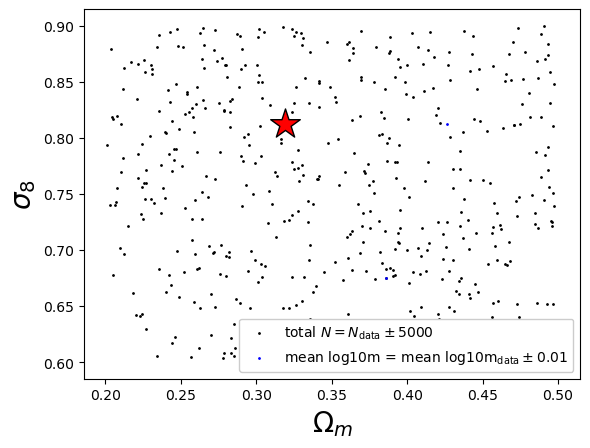

In [72]:
#plt.scatter(data['failed_theta'][:,0], data['failed_theta'][:,1])
count = np.sum(np.sum(data['x'][0], axis=1), axis=1)
#plt.scatter(data['theta'][:,0], data['theta'][:,1],s=1)
mask = (count > 0)*(data['theta'][:,2] > -9)*(data['theta'][:,2] < -8)
#plt.scatter(data['theta'][:,0][mask], data['theta'][:,1][mask],s=3, c=np.log10(count[mask]), cmap='rainbow')
#plt.colorbar(label='total count per simulation')

mask = (count>40000)*(count<200000)*(data['theta'][:,2] > -9)*(data['theta'][:,2] < -8)
plt.scatter(data['theta'][:,0][mask], data['theta'][:,1][mask],s=1, c='k', label=r'total $N = N_{\rm data} \pm 5000$')

mask = (mean_mass>14.5)*(mean_mass<14.53)*(data['theta'][:,2] > -9)*(data['theta'][:,2] < -8)
plt.scatter(data['theta'][:,0][mask], data['theta'][:,1][mask],s=1, c='b', label=r'mean log10m = mean log10m$_{\rm data} \pm 0.01$')

plt.scatter([0.319], [0.813], s=500, marker = '*',color = 'r', edgecolors='k')
plt.legend(framealpha=1)
plt.xlabel(r'$\Omega_m$', fontsize=20)
plt.ylabel(r'$\sigma_8$', fontsize=20)

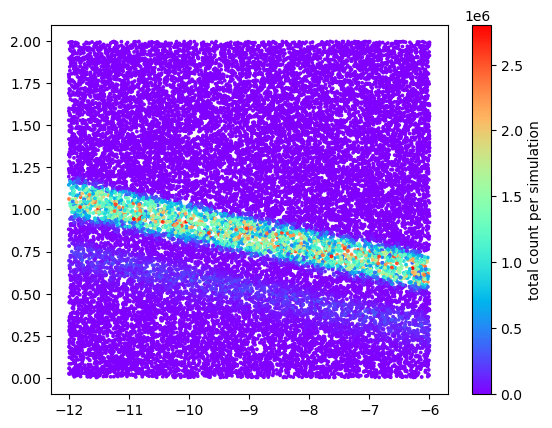

In [65]:

#plt.scatter(data['theta'][:,2][mask], data['theta'][:,3][mask],s=3, c=count[mask], cmap='rainbow')
plt.scatter(data['theta'][:,2], data['theta'][:,3],s=3, c=count, cmap='rainbow')
plt.colorbar(label='total count per simulation')

In [148]:
data = load_pickle('./config_sbi_narrow_prior_1_param/simulations.pkl')
count = data['x'][0]

In [149]:
log10mass = data['x'][1]

In [180]:
mask = np.sum(np.sum(data['x'][0], axis=1), axis=1) > 90000

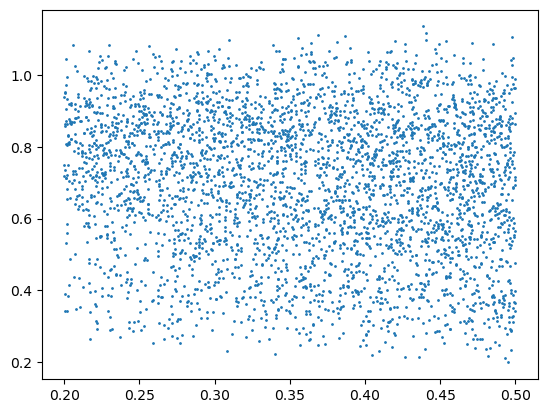

In [181]:
plt.scatter(data['theta'][:,0][mask], data['theta'][:,3][mask], s=1)

In [71]:
z_bin=4
rich_bin=5

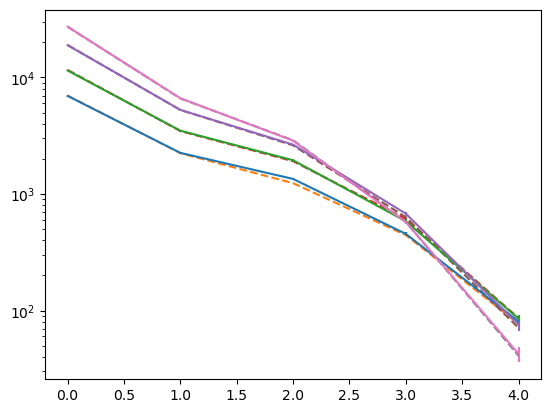

In [72]:
x = np.arange(len(np.mean(count, axis=0)))
for i in range(z_bin):
    plt.errorbar(x, np.mean(count, axis=0)[:,i], np.std(count, axis=0)[:,i])
    plt.plot(x, summary['count_with_m200b_def'][:,i], '--')
plt.yscale('log')

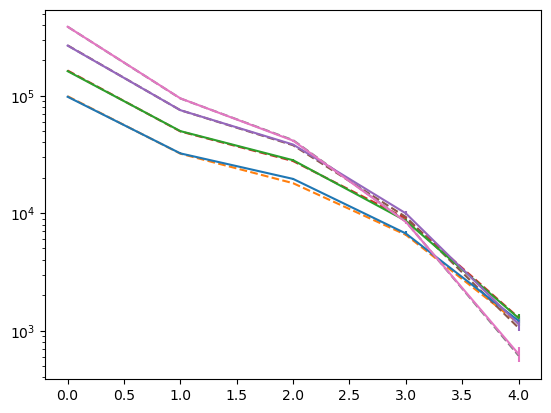

In [73]:
x = np.arange(len(np.mean(count, axis=0)))
for i in range(z_bin):
    plt.errorbar(x, np.mean(count*log10mass, axis=0)[:,i],np.std(count*log10mass, axis=0)[:,i])
    plt.plot(x, summary['count_with_m200b_def'][:,i] * summary['mean_log10m200b'][:,i], '--')
plt.yscale('log')

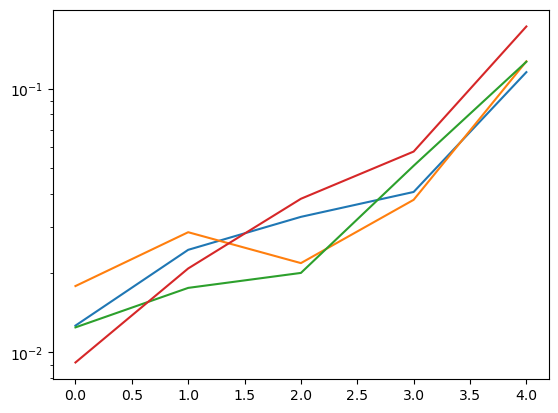

In [74]:
x = np.arange(len(np.mean(count, axis=0)))
for i in range(z_bin):
    plt.plot(np.std(count*10**log10mass, axis=0)[:,i]/np.mean(count*10**log10mass, axis=0)[:,i])
    
plt.yscale('log')